In [12]:
from biocrnpyler import * 
from matplotlib import pyplot as plt

Docs: https://github.com/BuildACell/bioCRNpyler

In [4]:
crn = ChemicalReactionNetwork(species = [], reactions = [])

Created the below species, I have assigned ST we have. Also it looks like `biocrnypler` requires rate constants which I will initialize as 1 for all 3 [k1, k2, k3]

* a = $\sqrt{2}$
* b = $\sqrt{3}$
* c = A + B 
* d = A - B
* e = A * B 

In [26]:
A=Species("A")
B=Species("B")
C=Species("C")
D=Species("D")
E=Species("E")

k1 = 1.
k2 = 1.
k3 = 1.

In [27]:
# let r1 be our addition where A + B -> C 
r1 = Reaction.from_massaction(inputs=[A,B], outputs=[C], k_forward=k1)

In [28]:
crn = ChemicalReactionNetwork(species = [A,B,C], reactions = [r1])

In [29]:
print(crn.pretty_print(show_materials = True, show_rates = True, show_attributes = True))


Species(N = 3) = {
C (@ 0),  B (@ 0),  A (@ 0),  
}

Reactions (1) = [
0. A+B --> C
 Kf=k_forward * A * B
  k_forward=1.0

]


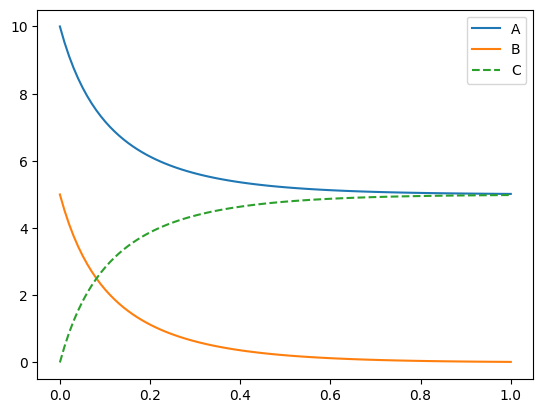

In [30]:
import bioscrape 
import numpy as np

x0 = {
    A: 10,
    B:5, 
    C: 0
}
timepoints = np.linspace(0, 1, 100)
R = crn.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

plt.plot(R['time'], R[str(A)], label = "A")
plt.plot(R['time'], R[str(B)], label = "B")
plt.plot(R['time'], R[str(C)], "--", label = "C")
plt.legend()
    

### Immediate Questions:
* In our last call we discussed x=$\sqrt{x}$ to derive x' = 2 - x $^{2}$ - can you elaborate more how this was derived?
* I know we had discussed using https://docs.sciml.ai/Catalyst/stable/ but this seemed like a suitable python implementation for now?

### Simulation with `scipy`

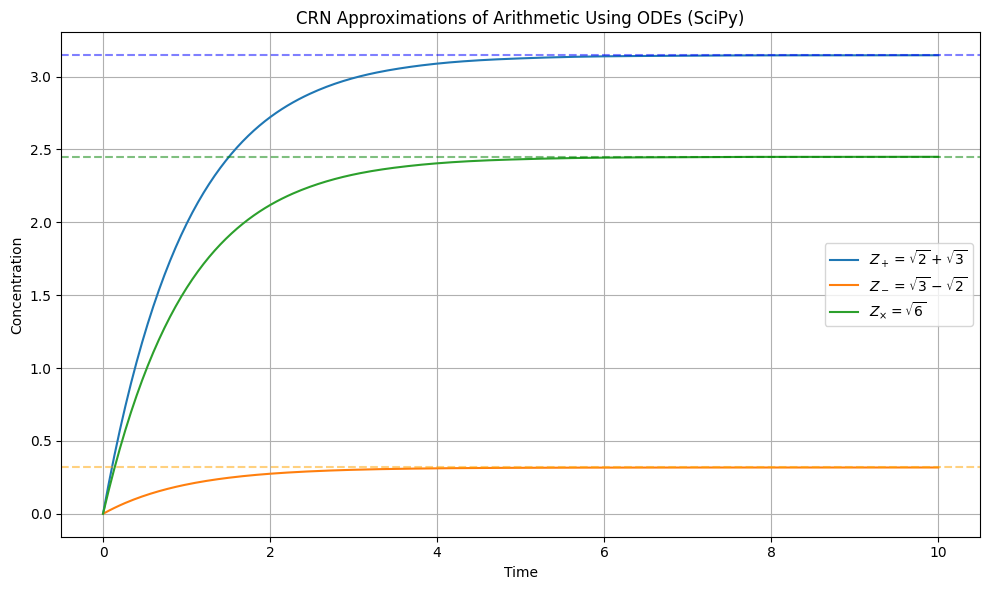

In [32]:
from scipy.integrate import solve_ivp

# Constants (fixed species concentrations)
X_val = np.sqrt(2)
Y_val = np.sqrt(3)

# Reaction rate constants
k1 = 1.0  # production
k2 = 1.0  # degradation

# ODE system: [Z_plus, Z_minus, Z_times]
def crn_system(t, z):
    Z_plus, Z_minus, Z_times = z

    dZ_plus_dt = k1 * (X_val + Y_val) - k2 * Z_plus
    dZ_minus_dt = k1 * (Y_val - X_val) - k2 * Z_minus
    dZ_times_dt = k1 * X_val * Y_val - k2 * Z_times

    return [dZ_plus_dt, dZ_minus_dt, dZ_times_dt]

# Initial concentrations
z0 = [0.0, 0.0, 0.0]

# Time span for simulation
t_span = (0, 10)
t_eval = np.linspace(*t_span, 300)

# Solve the system using SciPy's ODE solver
sol = solve_ivp(crn_system, t_span, z0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label=r'$Z_+ = \sqrt{2} + \sqrt{3}$')
plt.plot(sol.t, sol.y[1], label=r'$Z_- = \sqrt{3} - \sqrt{2}$')
plt.plot(sol.t, sol.y[2], label=r'$Z_{\times} = \sqrt{6}$')

# Draw steady state reference lines
plt.axhline(np.sqrt(2) + np.sqrt(3), color='blue', linestyle='--', alpha=0.5)
plt.axhline(np.sqrt(3) - np.sqrt(2), color='orange', linestyle='--', alpha=0.5)
plt.axhline(np.sqrt(6), color='green', linestyle='--', alpha=0.5)

plt.title("CRN Approximations of Arithmetic Using ODEs (SciPy)")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

![title](images/crn_sqrt2_sqrt3_operations.png)